In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_excel('Data/Default.xlsx', index_col = 0)

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0


In [3]:
## We are interested in making model with Balance and predict default2
X = df.balance.values.reshape(-1, 1)
y = df.default2.values.reshape(-1, 1)

X_range = np.linspace(X.min(), X.max(), 10000)
## sklearn log reg model
model = skl_lm.LogisticRegression()
model.fit(X, y)
prediction = model.predict(X)
prediction_prob = model.predict_proba(X_range)[:,1]

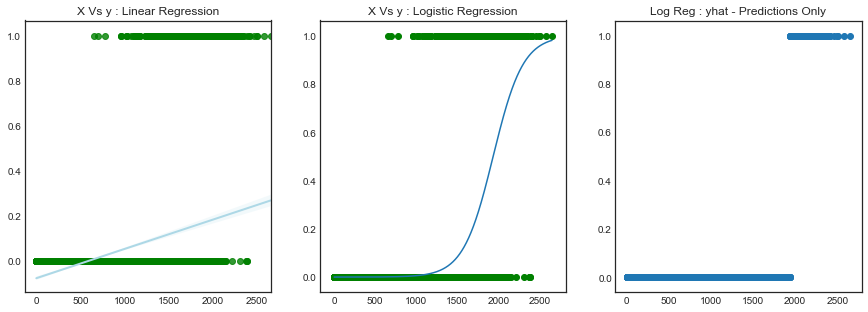

In [16]:
fig = plt.figure(figsize = (15, 5))
plt.subplot(131)
plt.title("X Vs y : Linear Regression")
sns.regplot(X, y, scatter_kws={'color':'green'}, line_kws={'color':'lightblue', 'lw':2})
plt.subplot(132)
X_range = np.arange(X.min(), X.max()).reshape(-1, 1)
plt.plot(X_range, prediction_prob)
plt.scatter(X, y,color =  'g')
plt.title("X Vs y : Logistic Regression")
plt.subplot(133)
plt.title("Log Reg : yhat - Predictions Only")
plt.scatter(X, prediction)

In [17]:
# Log Reg Model Parameters
print(model.classes_)
print(model.coef_)
print(model.intercept_)

[0 1]
[[0.00549892]]
[-10.65132824]


In [23]:
X_logit = sm.add_constant(df['balance'])
model2 = sm.Logit(y, X_logit).fit()
model2.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
const,-10.6513,0.361,-29.491,0.000,-11.359,-9.943
balance,0.0055,0.000,24.952,0.000,0.005,0.006


## Gradient Descent


In [26]:
theta

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [25]:
def sigmoid(val):
    return 1/(1 + np.exp(-val))

alpha = 0.05
theta = np.zeros(shape = X_logit.shape)
cost = []
for i in range(10):
    X 

0
1
2
3
4
5
6
7
8
9


## Multiple Linear Regression